In [1]:
from transformers import pipeline

# Load pre-trained BERT sentiment model
nlp_model = pipeline("sentiment-analysis")

# Test with sample sentences
texts = ["I love deep learning!", "This is a terrible movie."]
predictions = nlp_model(texts)

# Print results
for text, pred in zip(texts, predictions):
    print(f"Text: {text}\nPrediction: {pred}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


Text: I love deep learning!
Prediction: {'label': 'POSITIVE', 'score': 0.9998645782470703}

Text: This is a terrible movie.
Prediction: {'label': 'NEGATIVE', 'score': 0.9996908903121948}



### Handle Different Sentiments Separately

In [2]:
for text, pred in zip(texts, predictions):
    sentiment, confidence = pred["label"], pred["score"]
    
    if sentiment == "POSITIVE":
        response = "😊 That sounds great!"
    else:
        response = "😞 That doesn't seem good."

    print(f"Text: {text}\nPrediction: {sentiment} (Confidence: {confidence:.2f})\nResponse: {response}\n")


Text: I love deep learning!
Prediction: POSITIVE (Confidence: 1.00)
Response: 😊 That sounds great!

Text: This is a terrible movie.
Prediction: NEGATIVE (Confidence: 1.00)
Response: 😞 That doesn't seem good.



### Try a Different Sentiment Model

In [3]:
# Load pre-trained model
nlp_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")


# Test with sample sentences
texts = ["I love deep learning!", "This is a terrible movie."]
predictions = nlp_model(texts)

# Print results
for text, pred in zip(texts, predictions):
    print(f"Text: {text}\nPrediction: {pred}\n")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


Text: I love deep learning!
Prediction: {'label': 'neutral', 'score': 0.398252010345459}

Text: This is a terrible movie.
Prediction: {'label': 'neutral', 'score': 0.37008607387542725}



### Batch Processing for Efficiency

In [4]:
nlp_model = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

texts = ["I love deep learning!", "This is a terrible movie.", "The product is amazing!", "I hate waiting in long lines."]
predictions = nlp_model(texts)

for text, pred in zip(texts, predictions):
    print(f"Text: {text}\nPrediction: {pred}\n")


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


Text: I love deep learning!
Prediction: {'label': 'POSITIVE', 'score': 0.9998645782470703}

Text: This is a terrible movie.
Prediction: {'label': 'NEGATIVE', 'score': 0.9996908903121948}

Text: The product is amazing!
Prediction: {'label': 'POSITIVE', 'score': 0.9998868703842163}

Text: I hate waiting in long lines.
Prediction: {'label': 'NEGATIVE', 'score': 0.9968921542167664}



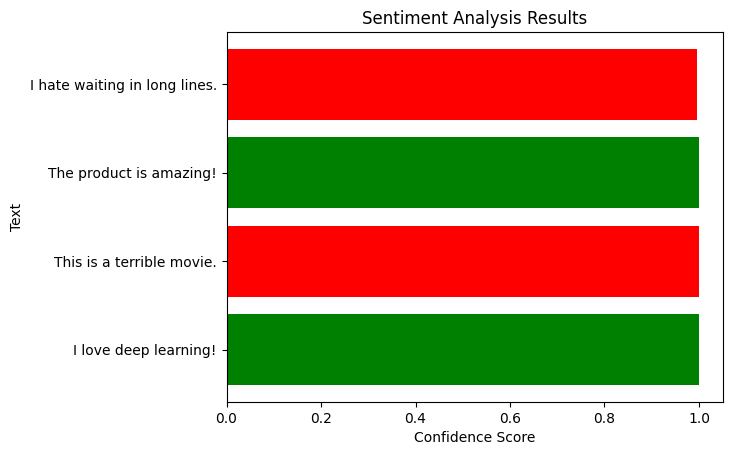

In [5]:
import matplotlib.pyplot as plt

texts = ["I love deep learning!", "This is a terrible movie.", "The product is amazing!", "I hate waiting in long lines."]
predictions = nlp_model(texts)

labels = [pred["label"] for pred in predictions]
scores = [pred["score"] for pred in predictions]

plt.barh(texts, scores, color=['green' if label == 'POSITIVE' else 'red' for label in labels])
plt.xlabel("Confidence Score")
plt.ylabel("Text")
plt.title("Sentiment Analysis Results")
plt.show()


### Multilingual Sentiment Analysis

In [6]:
from transformers import pipeline

# Load multilingual sentiment model
nlp_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Sample texts in different languages
texts = [
    "I love deep learning!",  # English
    "Este producto es increíble!",  # Spanish ("This product is amazing!")
    "Ce film est terrible.",  # French ("This movie is terrible.")
    "Ich hasse es, in langen Schlangen zu warten.",  # German ("I hate waiting in long lines.")
    "これは素晴らしいです！"  # Japanese ("This is wonderful!")
]

# Get predictions
predictions = nlp_model(texts)

# Print results
for text, pred in zip(texts, predictions):
    print(f"Text: {text}\nPrediction: {pred}\n")


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

C:\Users\anjal\DA_CA\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\anjal\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use 0


Text: I love deep learning!
Prediction: {'label': '5 stars', 'score': 0.8166466355323792}

Text: Este producto es increíble!
Prediction: {'label': '5 stars', 'score': 0.848731279373169}

Text: Ce film est terrible.
Prediction: {'label': '1 star', 'score': 0.7005010843276978}

Text: Ich hasse es, in langen Schlangen zu warten.
Prediction: {'label': '5 stars', 'score': 0.5530237555503845}

Text: これは素晴らしいです！
Prediction: {'label': '5 stars', 'score': 0.4931926429271698}

